In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Timestamp
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

3.10.0


In [2]:
df=pd.read_excel("AMZN.xlsx")

C:\Users\ravin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



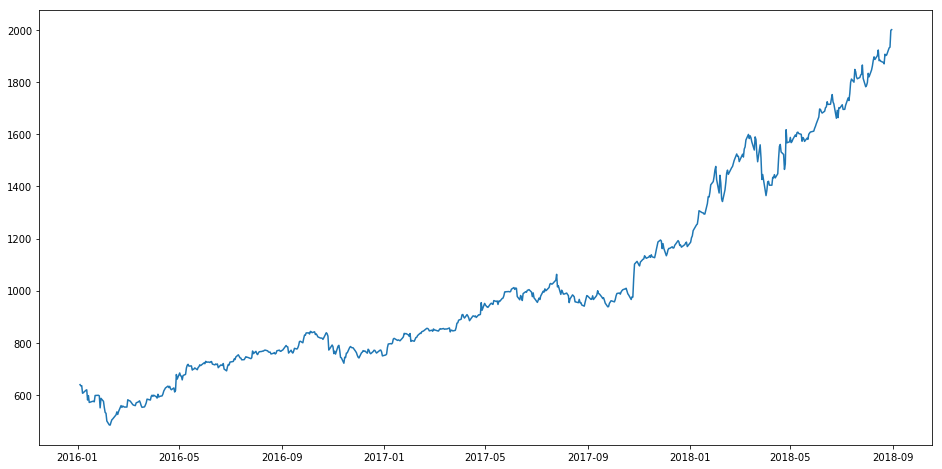

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close '], label='Close Price history')


In [4]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close '])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close '][i] = data['Close '][i]
    
#splitting into train and validation
train = new_data[:530]
valid = new_data[530:]

new_data.shape, train.shape, valid.shape
((671, 2), (530, 2), (134, 2))

train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2013-10-08 00:00:00'),
Timestamp('2017-10-06 00:00:00'),
Timestamp('2017-10-09 00:00:00'),
Timestamp('2018-10-08 00:00:00'))

preds = []
for i in range(0,248):
    a = train['Close '][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)


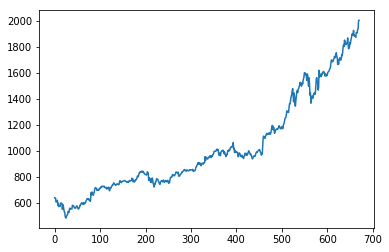

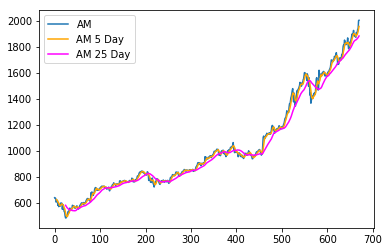

In [5]:
amazon = pd.read_excel('AMZN.xlsx')
df = amazon[['Close ']]

df.reset_index(level=0, inplace=True)

df.columns=['ds','y']

plt.plot(df.ds, df.y)

plt.show()

rolAvg = df.y.rolling(window=5).mean()

rolAvg2 = df.y.rolling(window=25).mean()

plt.plot(df.ds, df.y, label='AM')

plt.plot(df.ds, rolAvg, label='AM 5 Day', color='orange')

plt.plot(df.ds, rolAvg2, label='AM 25 Day', color='magenta')

plt.legend(loc='upper left')

plt.show()





Co-integration test

The two series, Y and X follow the follwing:
Y = ⍺ X + e 
where ⍺ is the constant ratio and e is white noise 

The Null hypothesis is that there is no cointegration, the alternative hypothesis is that there is cointegrating relationship. 
If the pvalue is small, below a critical size, then we can reject the hypothesis that there is no cointegrating relationship.
If the two series are almost perfectly collinear, then computing the test is numerically unstable. 
However, the two series will be cointegrated under the maintained assumption that they are integrated. 
In this case the t-statistic will be set to -inf and the pvalue to zero.
Trading stratergies
The ratio (Y/X) moves around it’s mean value ⍺ 
Following are the stratergies:
The ratio of the two reverting to the mean
Going Long the Ratio:
This is when the ratio ⍺ is smaller than usual and we expect it to increase. In the above example, we place a bet on this by buying Y and selling X.

In [6]:
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import coint, adfuller

In [7]:
def coin_test(x,y):
    x1=df[x]
    y1=df[y]
    coin_result = ts.coint(x1, y1) 
    print('coint_t (float) – t-statistic of unit-root test on residuals: {}'.format(coin_result[0]))
    print()
    print('pvalue (float) – MacKinnon’s approximate, asymptotic p-value based on MacKinnon (1994): {}'.format(coin_result[1]))
    print()
    print('crit_value (dict) – Critical values for the test statistic at the 1 %, 5 %, and 10 % levels based on regression curve. This depends on the number of observations: {}'.format(coin_result[2]))
        
    coin_test('Close ', 'rolAvg')
    df[['Close ','rolAvg']].iplot(kind='spread')

  #  (df['rolAvg']/['Close ']).plot(figsize=(15,7), x = 'observation_date') 
   # plt.axhline((df['rolAvg']/df['Close ']).mean(), color='red', linestyle='--') 
   # plt.xlabel('Time')
    # plt.legend(['Price Ratio', 'Mean'])
    #plt.show()

    #df[['Date','Close ']].iplot(kind='spread')

    #df[['Date','Close ']].iplot(kind='spread')


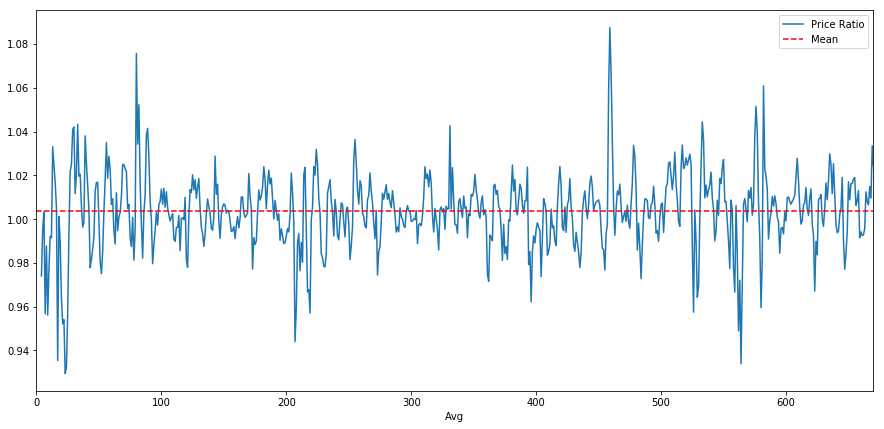

In [8]:
(amazon['Close ']/rolAvg).plot(figsize=(15,7), x = 'rolAvg') 
plt.axhline((amazon['Close ']/rolAvg).mean(), color='red', linestyle='--') 
plt.xlabel('Avg')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

# Ordinary least squares (OLS) Regression

In [9]:
import numpy as np
import statsmodels.api as sm

In [10]:
amazon.dropna().shape

(671, 6)

In [11]:

Y = np.asarray(rolAvg[:671])
X = np.asarray(amazon['Close '][4:])
X = sm.add_constant(X)
Y

array([     nan,      nan,      nan,      nan,  624.582,  620.264,
        617.27 ,  606.23 ,  604.43 ,  596.898,  588.396,  579.54 ,
        578.19 ,  578.272,  583.776,  588.416,  592.616,  587.966,
        585.784,  581.14 ,  571.7  ,  558.94 ,  554.806,  537.406,
        519.216,  505.816,  498.376,  493.33 ,  494.87 ,  502.702,
        512.782,  518.734,  525.11 ,  535.39 ,  541.098,  545.578,
        551.626,  555.03 ,  553.92 ,  559.794,  564.144,  568.638,
        573.158,  574.998,  570.834,  566.974,  563.18 ,  561.86 ,
        564.124,  567.468,  569.498,  569.498,  566.098,  562.128,
        558.864,  558.78 ,  563.77 ,  569.374,  577.43 ,  585.008,
        590.014,  593.034,  595.55 ,  594.25 ,  594.962,  594.412,
        593.502,  594.182,  597.372,  599.902,  605.86 ,  612.338,
        619.838,  624.708,  628.244,  628.734,  627.356,  625.946,
        622.57 ,  619.374,  630.274,  638.444,  649.934,  662.338,
        673.426,  669.3  ,  672.066,  670.988,  677.   ,  685.

In [12]:
Y = Y[np.logical_not(np.isnan(Y))]
Y

array([ 624.582,  620.264,  617.27 ,  606.23 ,  604.43 ,  596.898,
        588.396,  579.54 ,  578.19 ,  578.272,  583.776,  588.416,
        592.616,  587.966,  585.784,  581.14 ,  571.7  ,  558.94 ,
        554.806,  537.406,  519.216,  505.816,  498.376,  493.33 ,
        494.87 ,  502.702,  512.782,  518.734,  525.11 ,  535.39 ,
        541.098,  545.578,  551.626,  555.03 ,  553.92 ,  559.794,
        564.144,  568.638,  573.158,  574.998,  570.834,  566.974,
        563.18 ,  561.86 ,  564.124,  567.468,  569.498,  569.498,
        566.098,  562.128,  558.864,  558.78 ,  563.77 ,  569.374,
        577.43 ,  585.008,  590.014,  593.034,  595.55 ,  594.25 ,
        594.962,  594.412,  593.502,  594.182,  597.372,  599.902,
        605.86 ,  612.338,  619.838,  624.708,  628.244,  628.734,
        627.356,  625.946,  622.57 ,  619.374,  630.274,  638.444,
        649.934,  662.338,  673.426,  669.3  ,  672.066,  670.988,
        677.   ,  685.372,  697.338,  704.552,  711.05 ,  709.

In [13]:
X.size
Y.size

667

In [14]:
XinvX = np.linalg.inv(X.transpose()@X)
beta = XinvX@X.transpose()@Y
beta

array([6.38062425, 0.98982443])

In [15]:
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([6.38062425, 0.98982443])

In [16]:
results.tvalues

array([  3.15189444, 534.20929754])

In [17]:
print(results.f_test(np.identity(2)))

<F test: F=array([[1239709.85286433]]), p=0.0, df_denom=665, df_num=2>


In [18]:
y_hat = X@beta
rmse = np.sqrt(np.mean((y_hat-Y)**2))
print(rmse)

17.809086035318614


# MACD

In [19]:
short_window = 12
long_window = 26
amazon = amazon.set_index(pd.DatetimeIndex(amazon['Date']))
# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=amazon.Date.index)
signals['signal'] = 0.0
# Create short simple moving average over the short window
signals['short_mavg'] = amazon['Open '].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = amazon['Open '].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

 #Print `signals`
#print(signals)

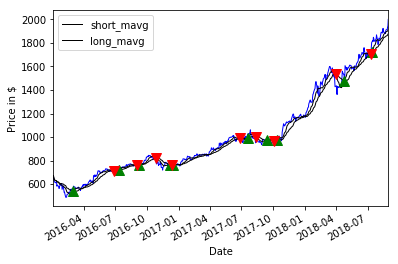

In [20]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
amazon['Open '].plot(ax=ax1, color='b', lw=1.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, color='black', lw=1.)
listLongShort = ["No data"] 

for i in range(1, len(signals)):
    #                          # If the MACD crosses the signal line upward
    if signals.long_mavg[i] > amazon['Open '][i] and signals.long_mavg[i - 1] <= amazon['Open '][i - 1]:
        listLongShort.append("BUY")
    #                          # The other way around
    elif signals.short_mavg[i] < amazon['Open '][i] and signals.short_mavg[i - 1] >= amazon['Open '][i - 1]:
        listLongShort.append("SELL")
    #                          # Do nothing if not crossed
    else:
        listLongShort.append("HOLD")

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='g')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r')
plt.rcParams['figure.figsize'] = (15,10)
      
# Show the plot
plt.show()

In [21]:
signals['positions'].value_counts()

 0.0    651
 1.0     10
-1.0      9
Name: positions, dtype: int64

In [22]:
signals

,signal,short_mavg,long_mavg,positions
Date,,,,
2016-01-04,0.0,672.320000,672.320000,NaN
2016-01-05,0.0,655.185000,655.185000,0.0
2016-01-06,0.0,644.713333,644.713333,0.0
2016-01-07,0.0,638.672500,638.672500,0.0
2016-01-08,0.0,634.348000,634.348000,0.0
2016-01-11,0.0,630.623333,630.623333,0.0
2016-01-12,0.0,629.225714,629.225714,0.0
2016-01-13,0.0,628.447500,628.447500,0.0
2016-01-14,0.0,623.434444,623.434444,0.0


In [23]:
amazon['Advice'] = listLongShort
amazon

,Date,Open,High,Low,Close,Volume,Advice
Date,,,,,,,
2016-01-04,2016-01-04,672.32,672.32,627.51,639.10,69804,No data
2016-01-05,2016-01-05,638.05,646.91,627.65,634.25,44335,BUY
2016-01-06,2016-01-06,623.77,639.79,618.64,635.20,40167,HOLD
2016-01-07,2016-01-07,620.55,630.00,605.21,606.00,54784,HOLD
2016-01-08,2016-01-08,617.05,624.14,606.00,608.36,42130,HOLD
2016-01-11,2016-01-11,612.00,619.85,598.57,617.51,75915,HOLD
2016-01-12,2016-01-12,620.84,625.99,612.24,619.28,36843,HOLD
2016-01-13,2016-01-13,623.00,623.50,579.16,580.00,60233,HOLD
2016-01-14,2016-01-14,583.33,602.25,569.88,597.00,57738,HOLD


In [24]:
signals.head()

,signal,short_mavg,long_mavg,positions
Date,,,,
2016-01-04,0.0,672.320000,672.320000,NaN
2016-01-05,0.0,655.185000,655.185000,0.0
2016-01-06,0.0,644.713333,644.713333,0.0
2016-01-07,0.0,638.672500,638.672500,0.0
2016-01-08,0.0,634.348000,634.348000,0.0
